# Задача 2

Условие - https://drive.google.com/drive/u/0/folders/1M9yAtO8dXq0wgi_BRWO5movv0BDuGTua


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from scipy.special import factorial
import warnings


Приведём систему к следующему виду
$\beta_2 + \epsilon_n = \beta_1 + \epsilon_0 \\
X_1 - X_0 = \beta_2 + \epsilon_1 \\
X_2 - X_1 = \beta_2 + \epsilon_2 \\
\ldots \\
X_n - X_{n-1} = X_0$


Тогда $X = 
\begin{pmatrix}
X_0 \\
X_1 - X_0 \\ 
\ldots \\
X_n - X_{n-1}
\end{pmatrix}$

Следовательно $Z = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\ 
\ldots \\
0 & 1
\end{pmatrix}$


Считывание:

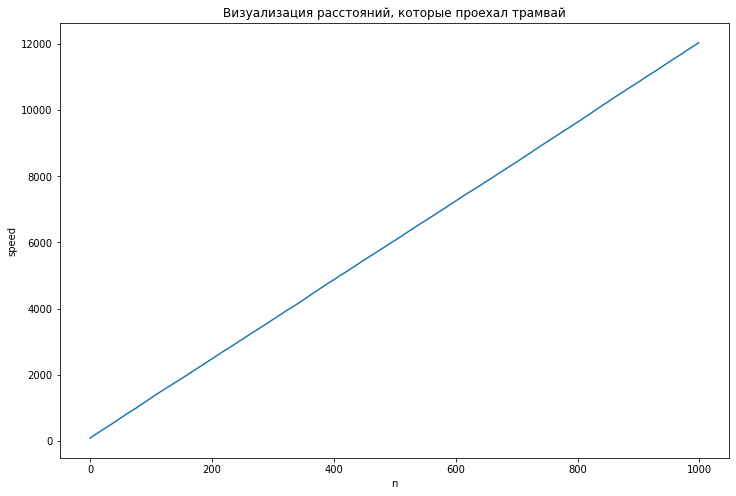

In [46]:
data = pd.read_csv("regression.csv", header=None, names=["distance"])
sample = np.array(data.values, dtype=float)

plt.figure(figsize=(12, 8))
plt.title('Визуализация расстояний, которые проехал трамвай')
plt.xlabel('n')
plt.ylabel('speed')
plt.plot(np.arange(len(sample)), sample)


Создаём $X$ и $Z$:

In [45]:
X = np.append(np.array(sample[0]), sample[1:] - np.roll(sample, 1)[1:])
Z = np.array([[1, 0]] + [[0, 1] for i in range(len(X) - 1)])
print(Z)

[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


На семинаре доказывали, что оценка методом наименьших квадратов выглядит так:
$\hat{\theta} = 
\begin{pmatrix}
X_0 \\
\frac{X_n - X_0}{n}
\end{pmatrix}$


In [38]:
thetas = np.array([sample[0][0], (sample[-1] - sample[0])[0] / (len(X))])
print("beta1 : ", thetas[0])
print("beta2 : ", thetas[1])


beta1 :  82.0053
beta2 :  11.958812199999999


Несмещённая оценка:
$$\hat{\sigma^2} = \frac{1}{n - 1} \left|\left|X - z\hat{\theta}\right|\right|^2$$

In [48]:
sigma = np.linalg.norm(X - np.dot(Z, thetas)) ** 2 / (len(X)) 
print("Несмещённая оценка для sigma^2 : ", sigma)


Несмещённая оценка для sigma^2 :  1.5223375382162339


$\epsilon_i \sim N(0, \sigma^2)$

$\epsilon_i^t = \frac{\epsilon_i}{\beta_2}$

Оценка дисперсии отсчета времени $\theta_D = \frac{\hat{\sigma^2}}{\beta_2^2}$

In [40]:
thetaD = sigma / (thetas[1] ** 2)
print("thetaD : ", thetaD)


thetaD :  0.010644735260858476


Итог - свели задачу к линейной модели, нашли оценку наименьших квадратов для $\beta_1$ и $\beta_2$, несмещённую оценку для $\sigma^2$
и выразили оценку дисперсии отсчёта времени. 

Линейная регрессия хорошо работает для оценивания истинных значений вектора из случайных величин с разными распределениями по наблюдениям в линейной модели.